# Empirical Data Inference
Infer evolutionary parameters from empirical data with the ensemble density estimators.

In [1]:
import torch
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from model.simulator import simulate
from utils import get_ensemble_predictions, calc_stats, sbi_post, get_mode_and_hdi, grab_short_sumstat, grab_long_sumstat, grab_man_sumstat
from model.params import readable_prior as prior 
from plotting import plot_from_post, set_plots_size_params, compare_posts, short_sumstats_plot, compare_posts_across_lines
set_plots_size_params(20)
# !pip install sbi==0.17.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
rename_dict = {'mu': r'Mutation rate (U)', 'w_ada': r'Beneficial fitness effect ($w_{b}$)', 
               'w_syn': r'Syn fitness effect ($w_{s}$)', 
               'w_non_syn': r'Non-syn fitness effect ($w_{ns}$)', 'p_ada_non_syn': r'Beneficial non-syn probability ($p_{bns}$)',
               'p_ada_syn': r'Beneficial syn probability ($p_{bs}$)', 'p0_non_syn': r'Mean initial non-syn ($M_{ns}$)', 
               'p0_syn': r'Mean initial syn ($M_{s}$)',
               'w_penalty': r'Initial log-fitness correlation ($\delta$)', 'epistasis_boost': r'Epistasis effect ($\eta$)'}


In [3]:
def infer_and_plot(ensemble_path, input_data, man_sumstat, syn_prob, sumstats_to_simulate=10,
                   plot_hdi=True, plot_short_PPC=True, plot_long_PPC=True, plot_freqs=True, samples_per_model=200):
    post, stats = get_ensemble_predictions(ensemble_path, input_data, None, prior, samples_per_model=samples_per_model)
    print(stats[stats.model=='ensemble'])
    post = post.rename(columns=rename_dict)
    post = post[rename_dict.values()]
    simulated_data = plot_from_post(post, stats, man_sumstat, num_of_samples=sumstats_to_simulate, syn_prob=syn_prob,
                                    plot_hdi=plot_hdi, plot_short_PPC=plot_short_PPC, plot_freqs=plot_freqs,
                                    plot_long_PPC=plot_long_PPC)
    return post, stats, simulated_data


In [4]:
# EB=1 --> no epistasis!, 0<EB<1 --> weak negative, EB<0 --> sign epistasis!
# PP=0 --> P0 muts are neutral, PP=1 --> P0 muts are not as deleterious as the rest of the muts

In [5]:
loop_coding = {}
loop_coding_short = {}
loop_coding_man = {}

def grab_long(sumstat):
    return sumstat[:204]

def grab_short(sumstat):
    return sumstat[:6]

def grab_man(sumstat):
    return np.concatenate((sumstat[:6],sumstat[204:]))

line_replica = {1: 'A', 2: 'B', 3: 'C'}

for i in range(1,4):
    total_coding_sumstat = torch.load(join('data_analysis', f'line{i}_total_sumstat.pt'))
    loop_coding[line_replica[i]] = grab_long(total_coding_sumstat)
    loop_coding_man[line_replica[i]] = grab_man(total_coding_sumstat)
    loop_coding_short[line_replica[i]] = grab_short(total_coding_sumstat)

syn_prob = 0.278

In [6]:
def get_ensemble_path(errs, replica, sumstat_type):
    return join('density_estimators', f'{errs} error rate', 'ensembles', replica, sumstat_type)

def get_ensemble_path_double_passage(replica):
    return join('model', 'all_double_passage', 'trained_nets_with_errs_2', replica, 'L-LR')


# LR Inference

In [7]:
inf_LR = {}

In [8]:
errs = '5e-05'
sumstat_type = 'LR'
replica = 'A'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.614500  -1.479509  1.138186    0.284846  -0.847207   
1            w_syn  0.896000   0.520800  1.022491    0.999945   0.789902   
2        w_non_syn  0.669000   0.212958  0.747533    0.930540   0.530238   
3            w_ada  1.611000   1.185013  0.899191    2.446943   1.454937   
4        p_ada_syn  0.000791   0.000001  1.202368    0.003944   0.000138   
5    p_ada_non_syn  0.007180   0.003167  0.765375    0.010000   0.006503   
6           p0_syn  0.537000   0.452806  0.721629    0.599975   0.509745   
7       p0_non_syn  0.781000   0.702122  0.621131    0.876337   0.748258   
8        w_penalty  0.089850   0.000028  0.967535    1.250358   0.001771   
9  epistasis_boost  0.297000  -0.874009  0.851048    1.773898  -0.033707   

   hdi50_high     model  
0   -0.304467  ensemble  
1    0.959249  ensemble  
2    0.806437  ensemble  
3    1.836116  ensemble  
4    0.001433  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [9]:
errs = '5e-05'
sumstat_type = 'LR'
replica = 'B'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.73150 -1.811993e+00  1.341628    0.222030  -0.996954   
1            w_syn  0.91100  4.616045e-01  0.997361    0.999649   0.827261   
2        w_non_syn  0.77700  2.394705e-01  0.739683    0.969181   0.578238   
3            w_ada  1.67000  1.095332e+00  0.878557    2.444098   1.488271   
4        p_ada_syn  0.00202  8.734306e-07  0.891810    0.005739   0.001118   
5    p_ada_non_syn  0.00597  2.462081e-03  0.701122    0.009984   0.005157   
6           p0_syn  0.53100  4.476113e-01  0.711877    0.599139   0.489745   
7       p0_non_syn  0.78100  7.002938e-01  0.685035    0.858004   0.733740   
8        w_penalty  0.03005  7.092780e-05  0.978890    1.291278   0.000071   
9  epistasis_boost -0.11145 -9.924022e-01  0.876013    1.381150  -0.480056   

   hdi50_high     model  
0   -0.388942  ensemble  
1    0.996322  ensemble  
2    0.852069  ensemble  
3    1.882465  ensemble  
4    0.0032

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [10]:
errs = '5e-05'
sumstat_type = 'LR'
replica = 'C'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.950000  -2.134355  1.824606   -0.101047  -1.314018   
1            w_syn  0.956000   0.438718  1.023902    0.999958   0.847969   
2        w_non_syn  0.837000   0.272196  0.765419    0.993729   0.663581   
3            w_ada  2.034500   1.489898  0.872485    2.725694   1.763558   
4        p_ada_syn  0.000762   0.000004  1.260392    0.003412   0.000655   
5    p_ada_non_syn  0.007760   0.002667  0.706946    0.009983   0.005529   
6           p0_syn  0.551000   0.467530  0.786433    0.600000   0.522603   
7       p0_non_syn  0.781000   0.700773  0.635211    0.871793   0.758428   
8        w_penalty  0.029800   0.000040  1.144136    1.137153   0.000040   
9  epistasis_boost  0.155000  -0.990044  0.964564    1.008365  -0.286337   

   hdi50_high     model  
0   -0.663283  ensemble  
1    0.997866  ensemble  
2    0.902779  ensemble  
3    2.177135  ensemble  
4    0.001891  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

# Estimating $\mu$ - LR

In [11]:
mu_l = min(inf_LR['A'][1].iloc[0,2] , inf_LR['B'][1].iloc[0,2] , inf_LR['C'][1].iloc[0,2])
mu_h = max(inf_LR['A'][1].iloc[0,4] , inf_LR['B'][1].iloc[0,4] , inf_LR['C'][1].iloc[0,4])
mu_est = (inf_LR['A'][1].iloc[0,1] + inf_LR['B'][1].iloc[0,1] + inf_LR['C'][1].iloc[0,1]) / 3

mu_l, mu_h, mu_est = round(10**mu_l,2), round(10**mu_h,2), round(10**mu_est,2)
print(f'μ_hat = {mu_est}\n {mu_l} <= μ <= {mu_h}')

μ_hat = 0.14
 0.01 <= μ <= 1.35


In [12]:
rename_dict = {'mu': r'Mutation rate (U)', 'w_ada': r'Beneficial fitness effect ($w_{b}$)', 
               'w_syn': r'Syn fitness effect ($w_{s}$)', 
               'w_non_syn': r'Non-syn fitness effect ($w_{ns}$)', 'p_ada_non_syn': r'Beneficial non-syn probability ($p_{bns}$)',
               'p_ada_syn': r'Beneficial syn probability ($p_{bs}$)', 'p0_non_syn': r'Mean initial non-syn ($M_{ns}$)', 
               'p0_syn': r'Mean initial syn ($M_{s}$)',
               'w_penalty': r'Initial log-fitness correlation ($\delta$)', 'epistasis_boost': r'Epistasis effect ($\eta$)'}

ax_dict = {r'Mutation rate (U)': (1,1), r'Syn fitness effect ($w_{s}$)': (1,2), 
           r'Non-syn fitness effect ($w_{ns}$)': (1,0), 
           r'Mean initial syn ($M_{s}$)': (0,0), r'Mean initial non-syn ($M_{ns}$)': (0,2),  
           r'Beneficial fitness effect ($w_{b}$)': (3,0), r'Initial log-fitness correlation ($\delta$)': (3,2), 
           r'Epistasis effect ($\eta$)': (3,1), r'Beneficial syn probability ($p_{bs}$)': (2,2), 
           r'Beneficial non-syn probability ($p_{bns}$)': (2,0)}


In [13]:
def compare_posts(posts, title_suffix='', colors=None, alpha=0.7, mu_xticks=(-3,1), legend_title=None, panel=None):
    mosaic = """
        AAA
        AAA
        BCD
        EFG
        HIJ
        """
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ax_dict = fig.subplot_mosaic(mosaic)
    if panel!=None:
        ax_dict['A'].set_title(f'({panel})\n', fontsize=20, loc='left')
    ax_dict['A'].set_ylabel('Density')
    param_to_plot_dict = {'Mutation rate (U)': 'A', r'Syn fitness effect ($w_{s}$)': 'B',
                          r'Non-syn fitness effect ($w_{ns}$)': 'C', 
                          r'Beneficial syn probability ($p_{bs}$)': 'E', 
                          r'Beneficial fitness effect ($w_{b}$)': 'D', 
                          r'Epistasis effect ($\eta$)': 'G', r'Mean initial syn ($M_{s}$)': 'H',
                          r'Beneficial non-syn probability ($p_{bns}$)': 'F',
                          r'Mean initial non-syn ($M_{ns}$)': 'I', r'Initial log-fitness correlation ($\delta$)': 'J'}
    if not colors:
        colors = sns.color_palette(None)
    legend = True
    for col_name, ax_index in param_to_plot_dict.items():
        ax = ax_dict[ax_index]
        col = 'err' if 'Mutation' in col_name else 'rel_err'
        for i, (name, df) in enumerate(posts.items()):
            df[col_name].hist(bins=30, label=name if legend else '_nolegend', ax=ax, alpha=alpha, color=colors[i], density=True)
            if 'Mutation' in col_name:
                xticks = range(mu_xticks[0], mu_xticks[1])
                ax.set_xticks(xticks)
                ax.set_xticklabels([10**x for x in xticks])
                ax.legend(loc='upper left', title=legend_title, fontsize=14)
            if 'probability' in col_name:
                xticks = [0, 0.005, 0.01]
                ax.set_xticks(xticks)
                ax.set_xticklabels(xticks)
            if 'stasis' in col_name:
                ax.axvline(0.5, ls='--', color='k')    
        ax.set_xlabel(col_name, fontsize=16)
        #if ax_index in ['A', 'B', 'E']:
        #    ax.set_ylabel('Density', size=25)
        legend = False
    return fig

In [14]:
def compare_posts_across_lines(outputs_dict, colors=None, alpha=0.7):
    if 'A' in outputs_dict.keys():
        compare_posts({line: output[0] for line, output in outputs_dict.items()}, 
                      colors=colors, alpha=alpha, title_suffix=' by Replica')
    else:
        lines_dict = {1:'A', 2:'B', 3:'C'}
        compare_posts({lines_dict[line]: output[0] for line, output in outputs_dict.items()}, 
                  colors=colors, alpha=alpha, title_suffix=' by Replica')


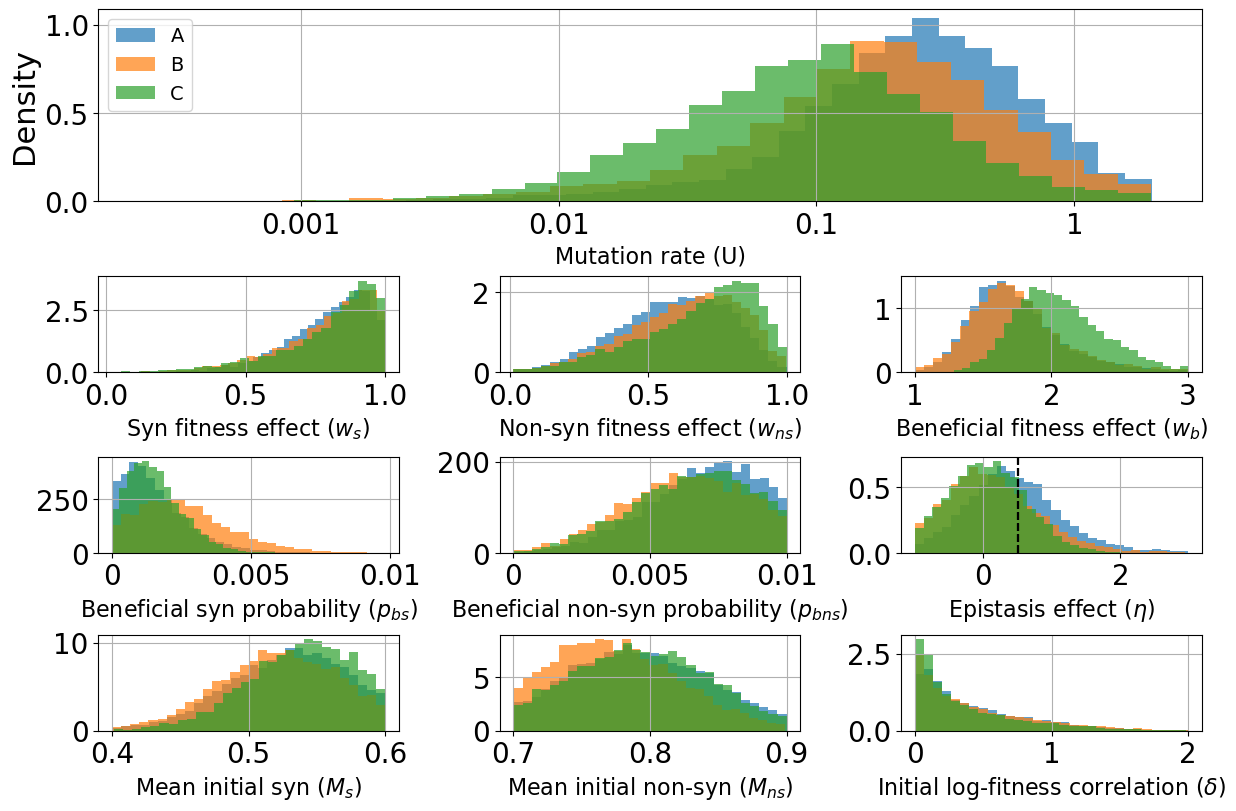

In [15]:
compare_posts_across_lines(inf_LR)

# L-LR Inference

In [16]:
inf_LLR = {}

In [17]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'A'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.43350 -9.730401e-01  1.347037   -0.056615  -0.646283   
1            w_syn  0.89700  6.572294e-01  1.289294    0.999760   0.830737   
2        w_non_syn  0.70250  4.031852e-01  0.964703    0.934916   0.656480   
3            w_ada  1.77900  1.470973e+00  1.317889    2.130897   1.638292   
4        p_ada_syn  0.00049  1.777061e-07  1.625189    0.002175   0.000269   
5    p_ada_non_syn  0.00641  3.016283e-03  0.737410    0.009990   0.005070   
6           p0_syn  0.51100  4.220422e-01  0.640498    0.594635   0.472621   
7       p0_non_syn  0.80300  7.117175e-01  0.632167    0.885734   0.767484   
8        w_penalty  0.15000  1.640594e-04  0.809423    1.394603   0.000164   
9  epistasis_boost -0.07135 -9.977046e-01  1.136035    0.519101  -0.523003   

   hdi50_high     model  
0   -0.334823  ensemble  
1    0.943058  ensemble  
2    0.840683  ensemble  
3    1.852438  ensemble  
4    0.0010

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [18]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'B'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.71650  -1.151838  1.711827   -0.233502  -0.881015   
1            w_syn  0.87950   0.617917  1.170753    0.999957   0.799307   
2        w_non_syn  0.67950   0.264736  0.835333    0.891530   0.538922   
3            w_ada  1.78700   1.512035  1.497952    2.025742   1.696890   
4        p_ada_syn  0.00151   0.000018  1.482082    0.002532   0.000796   
5    p_ada_non_syn  0.00612   0.003440  0.772715    0.009999   0.005807   
6           p0_syn  0.50300   0.430519  0.653817    0.598062   0.481601   
7       p0_non_syn  0.81500   0.710527  0.632615    0.885180   0.763974   
8        w_penalty  0.04960   0.000027  1.242901    0.845892   0.004981   
9  epistasis_boost -0.38000  -0.999560  1.182329    0.424361  -0.580712   

   hdi50_high     model  
0   -0.565947  ensemble  
1    0.932925  ensemble  
2    0.768921  ensemble  
3    1.875683  ensemble  
4    0.001761  ensemble  
5    0.008534  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [19]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'C'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.95050  -1.366966  2.073952   -0.405470  -1.080089   
1            w_syn  0.93050   0.693233  1.350537    0.999979   0.872448   
2        w_non_syn  0.67800   0.318406  0.853920    0.938086   0.588177   
3            w_ada  1.99450   1.738571  1.374586    2.346893   1.903786   
4        p_ada_syn  0.00067   0.000002  1.766930    0.001775   0.000298   
5    p_ada_non_syn  0.00678   0.003093  0.768032    0.009919   0.005152   
6           p0_syn  0.51300   0.428807  0.663918    0.596339   0.484820   
7       p0_non_syn  0.79900   0.712132  0.629419    0.887406   0.773189   
8        w_penalty  0.04050   0.000003  1.439527    0.679200   0.000003   
9  epistasis_boost -0.48650  -0.999445  1.221032    0.373049  -0.683291   

   hdi50_high     model  
0   -0.755218  ensemble  
1    0.981780  ensemble  
2    0.803301  ensemble  
3    2.110964  ensemble  
4    0.000995  ensemble  
5    0.007803  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

# Estimating $\mu$ - L-LR

In [20]:
mu_l = min(inf_LLR['A'][1].iloc[0,2] , inf_LLR['B'][1].iloc[0,2] , inf_LLR['C'][1].iloc[0,2])
mu_h = max(inf_LLR['A'][1].iloc[0,4] , inf_LLR['B'][1].iloc[0,4] , inf_LLR['C'][1].iloc[0,4])
mu_est = (inf_LLR['A'][1].iloc[0,1] + inf_LLR['B'][1].iloc[0,1] + inf_LLR['C'][1].iloc[0,1]) / 3

mu_l, mu_h, mu_est = round(10**mu_l,2), round(10**mu_h,2), round(10**mu_est,2)
print(f'μ_hat = {mu_est}\n {mu_l} <= μ <= {mu_h}')

μ_hat = 0.16
 0.03 <= μ <= 0.71


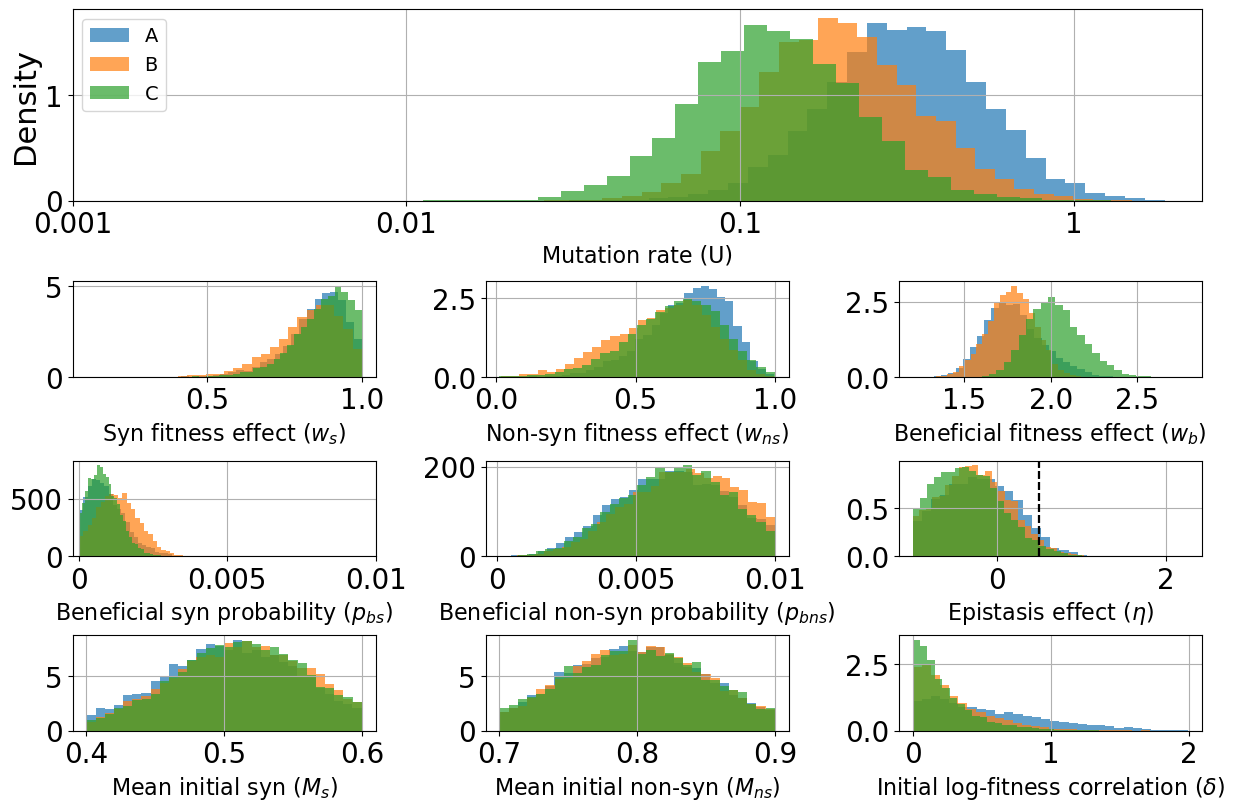

In [21]:
compare_posts_across_lines(inf_LLR)

# Pairwise Correlation for Estimated Model Parameters - L-LR

/tmp/ipykernel_1854191/2949537426.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
/tmp/ipykernel_1854191/2949537426.py:22: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])
/tmp/ipykernel_1854191/2949537426.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['low density'] + ['' for i in range(len(cbar.ax.get_yticklabels())-3)] +['high density'])


[Text(1, 0.0, 'low density'),
 Text(1, 1.0, ''),
 Text(1, 2.0, ''),
 Text(1, 3.0, ''),
 Text(1, 4.0, ''),
 Text(1, 5.0, 'high density'),
 Text(1, 6.0, '')]

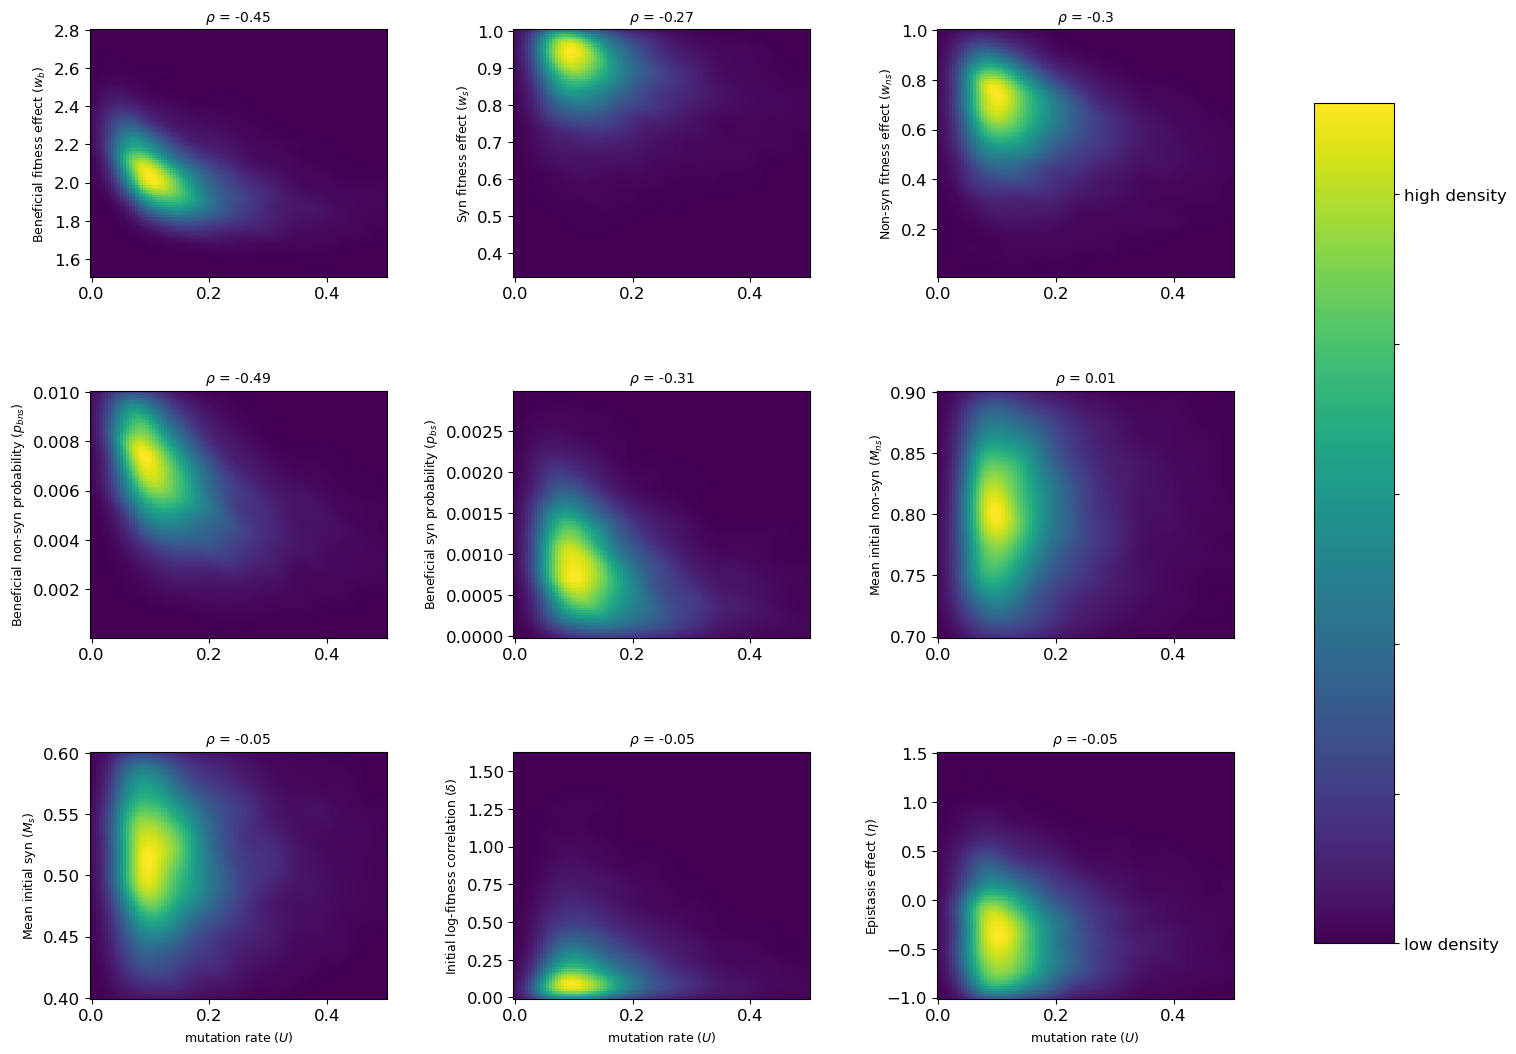

In [22]:
from scipy.stats import kde
from scipy.stats import pearsonr as corr
import matplotlib as mpl

label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['font.size'] = label_size
    
    
fig, ax = plt.subplots(3,3, constrained_layout=True, figsize=(16,12))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig.tight_layout(pad = 6, h_pad = 5)
samples = inf_LLR[replica][0]



for i in range(1,len(samples.columns)):
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    x,y = np.power(10,samples.iloc[:,0]), samples.iloc[:,i]
    nbins=100
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[0:0.5:nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    # Make the plot
    cax=ax[(i-1)//3, (i-1)%3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
    ax[(i-1)//3, (i-1)%3].set_title(f'$\\rho$ = {round(corr(x,y)[0],2)}', fontsize=10)
    ax[2, (i-1)%3].set_xlabel('mutation rate ($U$)', fontsize=9)
    ax[(i-1)//3, (i-1)%3].set_ylabel(samples.columns[i], fontsize=9)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.ax.set_yticklabels(['low density'] + ['' for i in range(len(cbar.ax.get_yticklabels())-3)] +['high density'])  

# SR Inference

In [23]:
inf_SR = {}

In [24]:
errs = '5e-05'
sumstat_type = 'SR'
replica = 'A'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.67150  -1.841462  1.398442    0.093271  -1.155257   
1            w_syn  0.91650   0.450679  0.972086    0.999974   0.812482   
2        w_non_syn  0.76850   0.257242  0.734795    0.981570   0.607282   
3            w_ada  2.11500   1.338087  0.704692    2.868211   1.774044   
4        p_ada_syn  0.00215   0.000004  0.862293    0.006123   0.001012   
5    p_ada_non_syn  0.00745   0.002775  0.728710    0.009993   0.005866   
6           p0_syn  0.55300   0.462797  0.774708    0.599987   0.523170   
7       p0_non_syn  0.79700   0.708036  0.648628    0.878157   0.756713   
8        w_penalty  0.00901   0.000020  1.085499    1.230501   0.000073   
9  epistasis_boost  0.09205  -0.993627  0.908513    1.262011  -0.374451   

   hdi50_high     model  
0   -0.467658  ensemble  
1    0.985200  ensemble  
2    0.886277  ensemble  
3    2.348912  ensemble  
4    0.003132  ensemble  
5    0.008862  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [25]:
errs = '5e-05'
sumstat_type = 'SR'
replica = 'B'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.733000  -1.936947  1.424601    0.200661  -1.200892   
1            w_syn  0.926000   0.456101  0.967793    0.999772   0.813157   
2        w_non_syn  0.797000   0.248470  0.721174    0.980289   0.576185   
3            w_ada  1.919000   1.323979  0.686604    2.931324   1.862710   
4        p_ada_syn  0.002750   0.000004  0.784859    0.006919   0.001495   
5    p_ada_non_syn  0.007760   0.002661  0.727514    0.009988   0.005578   
6           p0_syn  0.539000   0.453023  0.733581    0.599955   0.509549   
7       p0_non_syn  0.751000   0.700268  0.646762    0.866845   0.739829   
8        w_penalty  0.030100   0.000152  0.996257    1.382222   0.000152   
9  epistasis_boost  0.019105  -0.998805  0.901261    1.352524  -0.492765   

   hdi50_high     model  
0   -0.424312  ensemble  
1    0.990495  ensemble  
2    0.869802  ensemble  
3    2.470075  ensemble  
4    0.003948  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [26]:
errs = '5e-05'
sumstat_type = 'SR'
replica = 'C'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.74850  -1.827891  1.362973    0.150360  -1.104406   
1            w_syn  0.85700   0.435775  0.932207    0.999971   0.781841   
2        w_non_syn  0.71900   0.290509  0.741349    0.992726   0.616773   
3            w_ada  2.05950   1.403702  0.719839    2.942563   1.900618   
4        p_ada_syn  0.00153   0.000003  0.911226    0.005778   0.001109   
5    p_ada_non_syn  0.00676   0.002722  0.715824    0.009992   0.005515   
6           p0_syn  0.53500   0.448044  0.714715    0.599696   0.511922   
7       p0_non_syn  0.78700   0.702800  0.662656    0.869200   0.758616   
8        w_penalty  0.04995   0.000032  1.010947    1.411730   0.000381   
9  epistasis_boost  0.21300  -0.997607  0.965197    1.107678  -0.337411   

   hdi50_high     model  
0   -0.392006  ensemble  
1    0.970253  ensemble  
2    0.899440  ensemble  
3    2.482904  ensemble  
4    0.003158  ensemble  
5    0.008541  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [27]:
mu_l = min(inf_SR['A'][1].iloc[0,2] , inf_SR['B'][1].iloc[0,2] , inf_SR['C'][1].iloc[0,2])
mu_h = max(inf_SR['A'][1].iloc[0,4] , inf_SR['B'][1].iloc[0,4] , inf_SR['C'][1].iloc[0,4])
est = (inf_SR['A'][1].iloc[0,1] + inf_SR['B'][1].iloc[0,1] + inf_SR['C'][1].iloc[0,1]) / 3

print(10**est, 10**mu_l, 10**mu_h)

0.10475304755995306 0.014154515212229645 1.1272204421032088


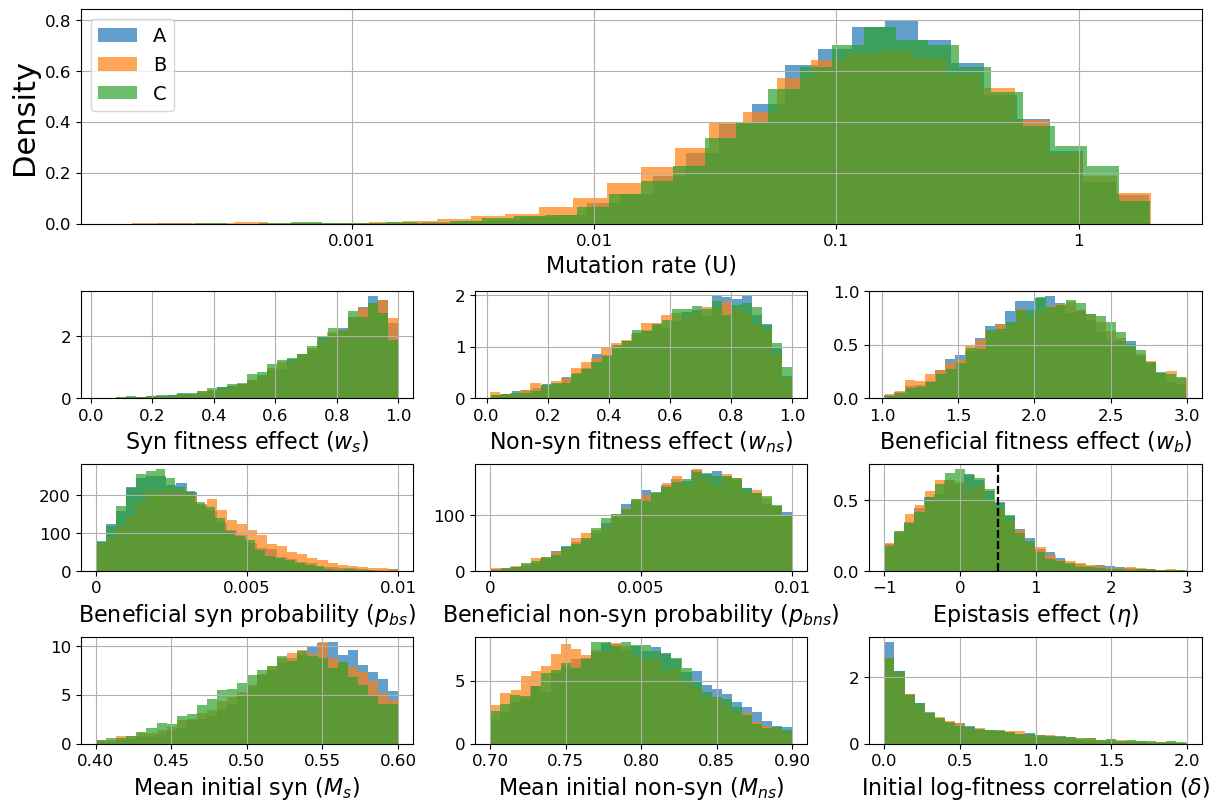

In [28]:
compare_posts_across_lines(inf_SR)

# L-LR inference - model with 2 passages per cycle

In [29]:
inf_LLR_DP = {}

In [30]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'A'
ensemble_path = get_ensemble_path_double_passage(replica)
inf_LLR_DP['double passage '+replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -1.008500 -1.850358e+00  1.769808   -0.015398  -1.318401   
1            w_syn  0.906500  6.025943e-01  1.175859    0.999997   0.863024   
2        w_non_syn  0.788000  3.916457e-01  0.873008    0.999669   0.648096   
3            w_ada  1.435500  1.182490e+00  1.378232    1.766654   1.342257   
4        p_ada_syn  0.000365  3.315200e-07  1.602226    0.002257   0.000006   
5    p_ada_non_syn  0.007360  2.812191e-03  0.734028    0.009994   0.005964   
6           p0_syn  0.507000  4.261315e-01  0.632890    0.598778   0.467612   
7       p0_non_syn  0.803000  7.192956e-01  0.620669    0.895244   0.770472   
8        w_penalty  0.030000  3.440954e-07  1.163657    1.085363   0.000396   
9  epistasis_boost -0.212000 -9.997751e-01  0.941871    0.984659  -0.629718   

   hdi50_high     model  
0   -0.690615  ensemble  
1    0.997786  ensemble  
2    0.860056  ensemble  
3    1.554579  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [31]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'B'
ensemble_path = get_ensemble_path_double_passage(replica)
inf_LLR_DP['double passage '+replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.908500 -1.631414e+00  1.662455   -0.021749  -1.205528   
1            w_syn  0.929500  6.376468e-01  1.227391    0.999993   0.840031   
2        w_non_syn  0.688000  3.145812e-01  0.862029    0.946948   0.576856   
3            w_ada  1.402000  1.076283e+00  1.450515    1.614377   1.301251   
4        p_ada_syn  0.001545  8.995702e-07  1.207769    0.003776   0.000757   
5    p_ada_non_syn  0.006150  2.463693e-03  0.715786    0.009800   0.004666   
6           p0_syn  0.515000  4.161645e-01  0.641828    0.591638   0.471031   
7       p0_non_syn  0.799000  7.139563e-01  0.641807    0.885976   0.762519   
8        w_penalty  0.130000  8.846630e-05  1.274006    0.835129   0.000238   
9  epistasis_boost  0.219500 -9.212642e-01  0.925029    1.253658  -0.335151   

   hdi50_high     model  
0   -0.690745  ensemble  
1    0.965489  ensemble  
2    0.786748  ensemble  
3    1.491274  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [32]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'C'
ensemble_path = get_ensemble_path_double_passage(replica)
inf_LLR_DP['double passage '+replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -1.14550  -2.230844  2.136993   -0.210645  -1.353437   
1            w_syn  0.90300   0.544594  1.047450    0.999943   0.796725   
2        w_non_syn  0.75000   0.368320  0.835689    0.995454   0.644062   
3            w_ada  1.40700   1.112157  1.325287    1.781875   1.299304   
4        p_ada_syn  0.00109   0.000003  1.272241    0.003391   0.000285   
5    p_ada_non_syn  0.00688   0.003012  0.737612    0.009995   0.005375   
6           p0_syn  0.49900   0.422266  0.634435    0.594942   0.482000   
7       p0_non_syn  0.78900   0.718088  0.632125    0.892744   0.770401   
8        w_penalty  0.05585   0.000003  1.502282    0.618114   0.000063   
9  epistasis_boost -0.26700  -0.990582  1.031996    0.815180  -0.459808   

   hdi50_high     model  
0   -0.819164  ensemble  
1    0.961786  ensemble  
2    0.873352  ensemble  
3    1.513556  ensemble  
4    0.001528  ensemble  
5    0.008270  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

# Estimating $\mu$ - L-LR (2 passages)

In [33]:
mu_l = min(inf_LLR_DP['double passage A'][1].iloc[0,2] , inf_LLR_DP['double passage B'][1].iloc[0,2] , inf_LLR_DP['double passage C'][1].iloc[0,2])
mu_h = max(inf_LLR_DP['double passage A'][1].iloc[0,4] , inf_LLR_DP['double passage B'][1].iloc[0,4] , inf_LLR_DP['double passage C'][1].iloc[0,4])
mu_est = (inf_LLR_DP['double passage A'][1].iloc[0,1] + inf_LLR_DP['double passage B'][1].iloc[0,1] + inf_LLR_DP['double passage C'][1].iloc[0,1]) / 3

mu_l, mu_h, mu_est = round(10**mu_l,2), round(10**mu_h,2), round(10**mu_est,2)
print(f'μ_hat = {mu_est}\n {mu_l} <= μ <= {mu_h}')

μ_hat = 0.05
 0.01 <= μ <= 0.63


## Fig 4A (without FITS)

In [36]:
def plot_post_estimates(ax, double_passage=False):
    # fits_post = pd.read_table('FITS/FITS_post.tsv')
    sample_size = 10000
    bin_num = 30
    alpha = 0.6
    # fits_post.log_U.sample(sample_size).hist(bins=bin_num, ax=ax, label='FITS', density=True, color=sns.color_palette()[7])
    all_posts['SR']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='SR', 
                                                               density=True,ax=ax)
    all_posts['LR']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='LR', 
                                                               density=True, ax=ax)
    all_posts['L-LR']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='L-LR', 
                                                                 density=True, ax=ax)
    if double_passage:
        all_posts['L-LR double passage']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='L-LR - double passage', 
                                                                 density=True, ax=ax)
    xticks = [-3,-2,-1, 0, 1]
    ax.set_xticks(xticks)
    ax.set_xticklabels([10**x for x in xticks])
    ax.set_yticks([0,0.5,1,1.5])
    ax.legend()
    ax.set_xlabel('Mutation rate (U)')

def compare_posts_for_paper(posts, title_suffix='', colors=None, alpha=0.7, mu_xticks=(-3,1), legend_loc=(0.42,0.46), panel=None):
    mosaic = """
        AAA
        AAA
        BCD
        EFG
        """
    fig = plt.figure(constrained_layout=True, figsize=(16,12))
    ax_dict = fig.subplot_mosaic(mosaic)
    if panel!=None:
        ax_dict['A'].set_title(f'({panel})\n', fontsize=20, loc='left')
    param_to_plot_dict = {'Mutation rate (U)': 'A', r'Syn fitness effect ($w_{s}$)': 'B',
                          r'Non-syn fitness effect ($w_{ns}$)': 'C', 
                          r'Beneficial syn probability ($p_{bs}$)': 'E', 
                          r'Beneficial fitness effect ($w_{b}$)': 'D', 
                          r'Epistasis effect ($\eta$)': 'G', 
                          r'Beneficial non-syn probability ($p_{bns}$)': 'F'}
    if not colors:
        colors = sns.color_palette(None)
    legend = True
    for col_name, ax_index in param_to_plot_dict.items():
        ax = ax_dict[ax_index]
        if 'Mutation' in col_name:
            col = 'err'
            double_passage=False
            if len(posts.keys())>3:
                double_passage=True
            plot_post_estimates(ax,double_passage)
        else:
            col = 'rel_err'
            for i, (name, df) in enumerate(posts.items()):
                df[col_name].hist(bins=20, label=name if legend else '_nolegend', ax=ax, alpha=alpha, color=colors[i], density=True)
                if 'probability' in col_name:
                    xticks = [0, 0.005, 0.01]
                    ax.set_xticks(xticks)
                    ax.set_xticklabels(xticks)
                if 'stasis' in col_name:
                    ax.axvline(0.5, ls='--', color='k')    
            ax.set_xlabel(col_name)
            fig.supylabel('Density', fontsize=30)
            legend = False
    

In [39]:
all_posts = {'SR': pd.concat([x[0] for x in inf_SR.values()]),
             'LR': pd.concat([x[0] for x in inf_LR.values()]),
             'L-LR': pd.concat([x[0] for x in inf_LLR.values()]),
            'L-LR double passage': pd.concat([x[0] for x in inf_LLR_DP.values()])}

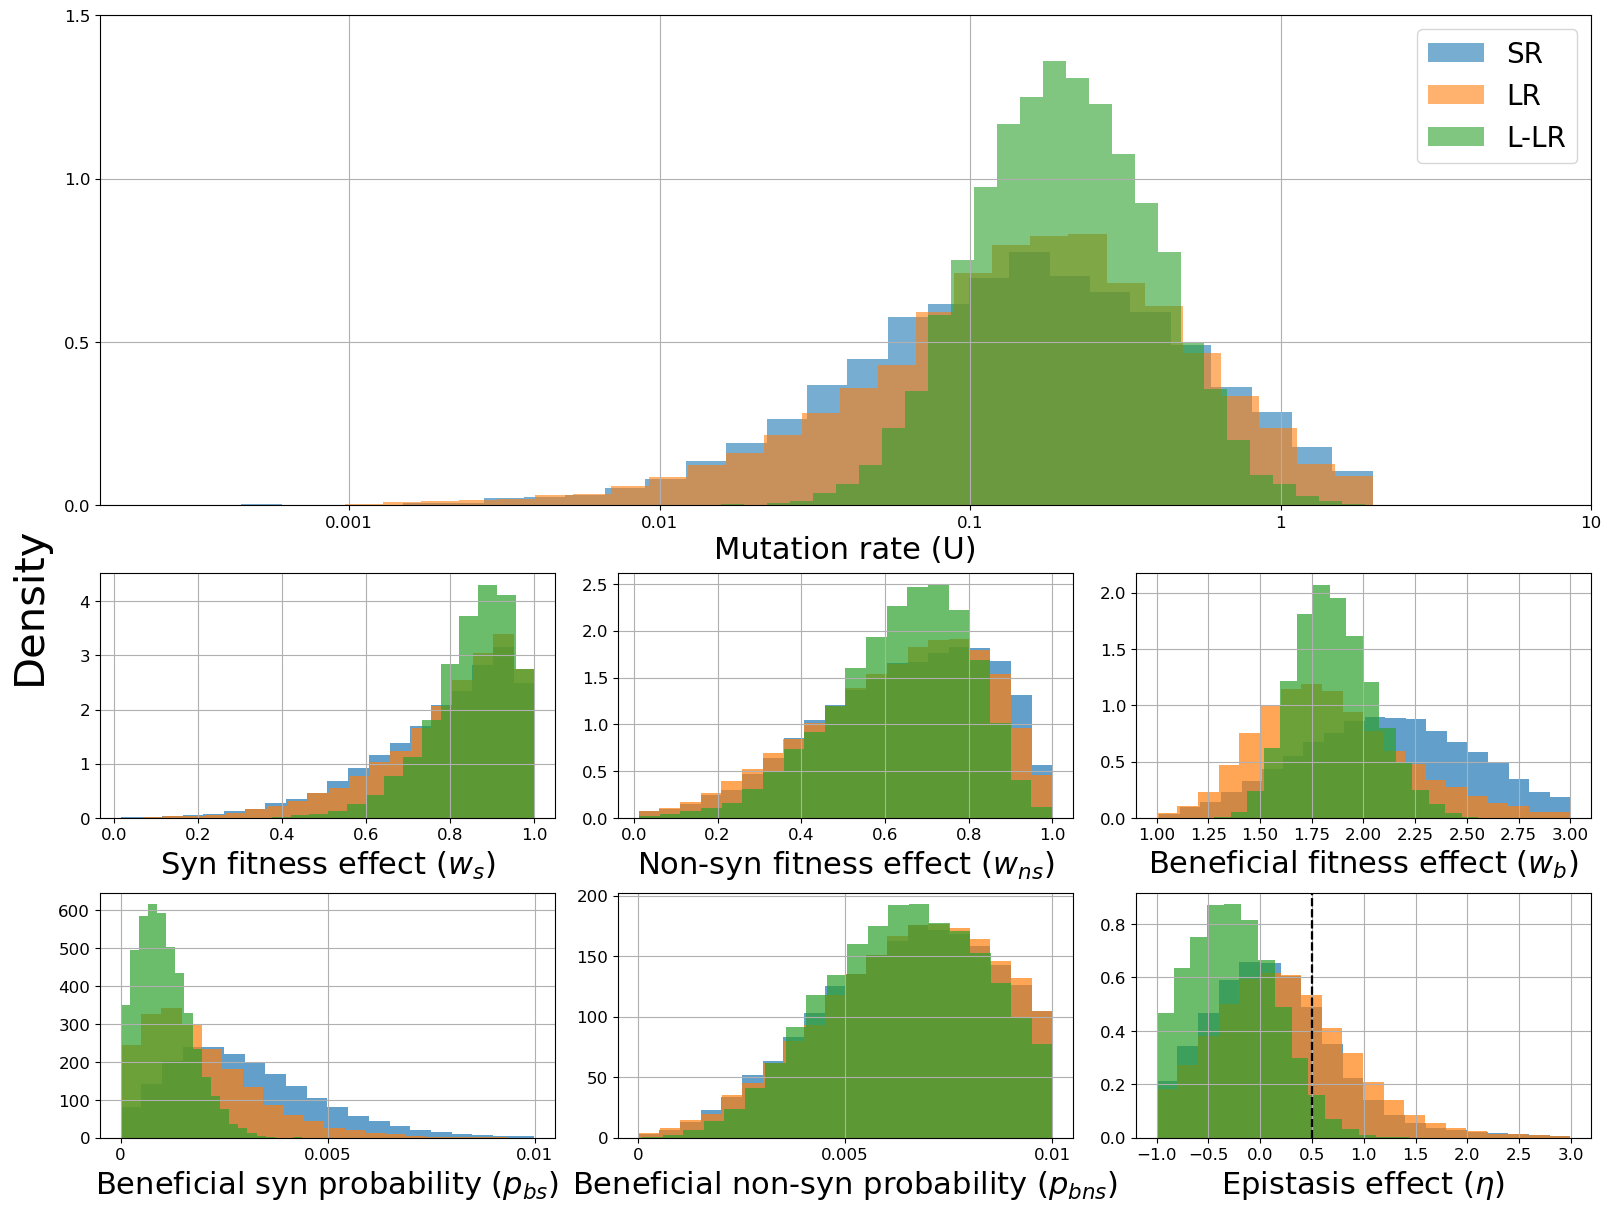

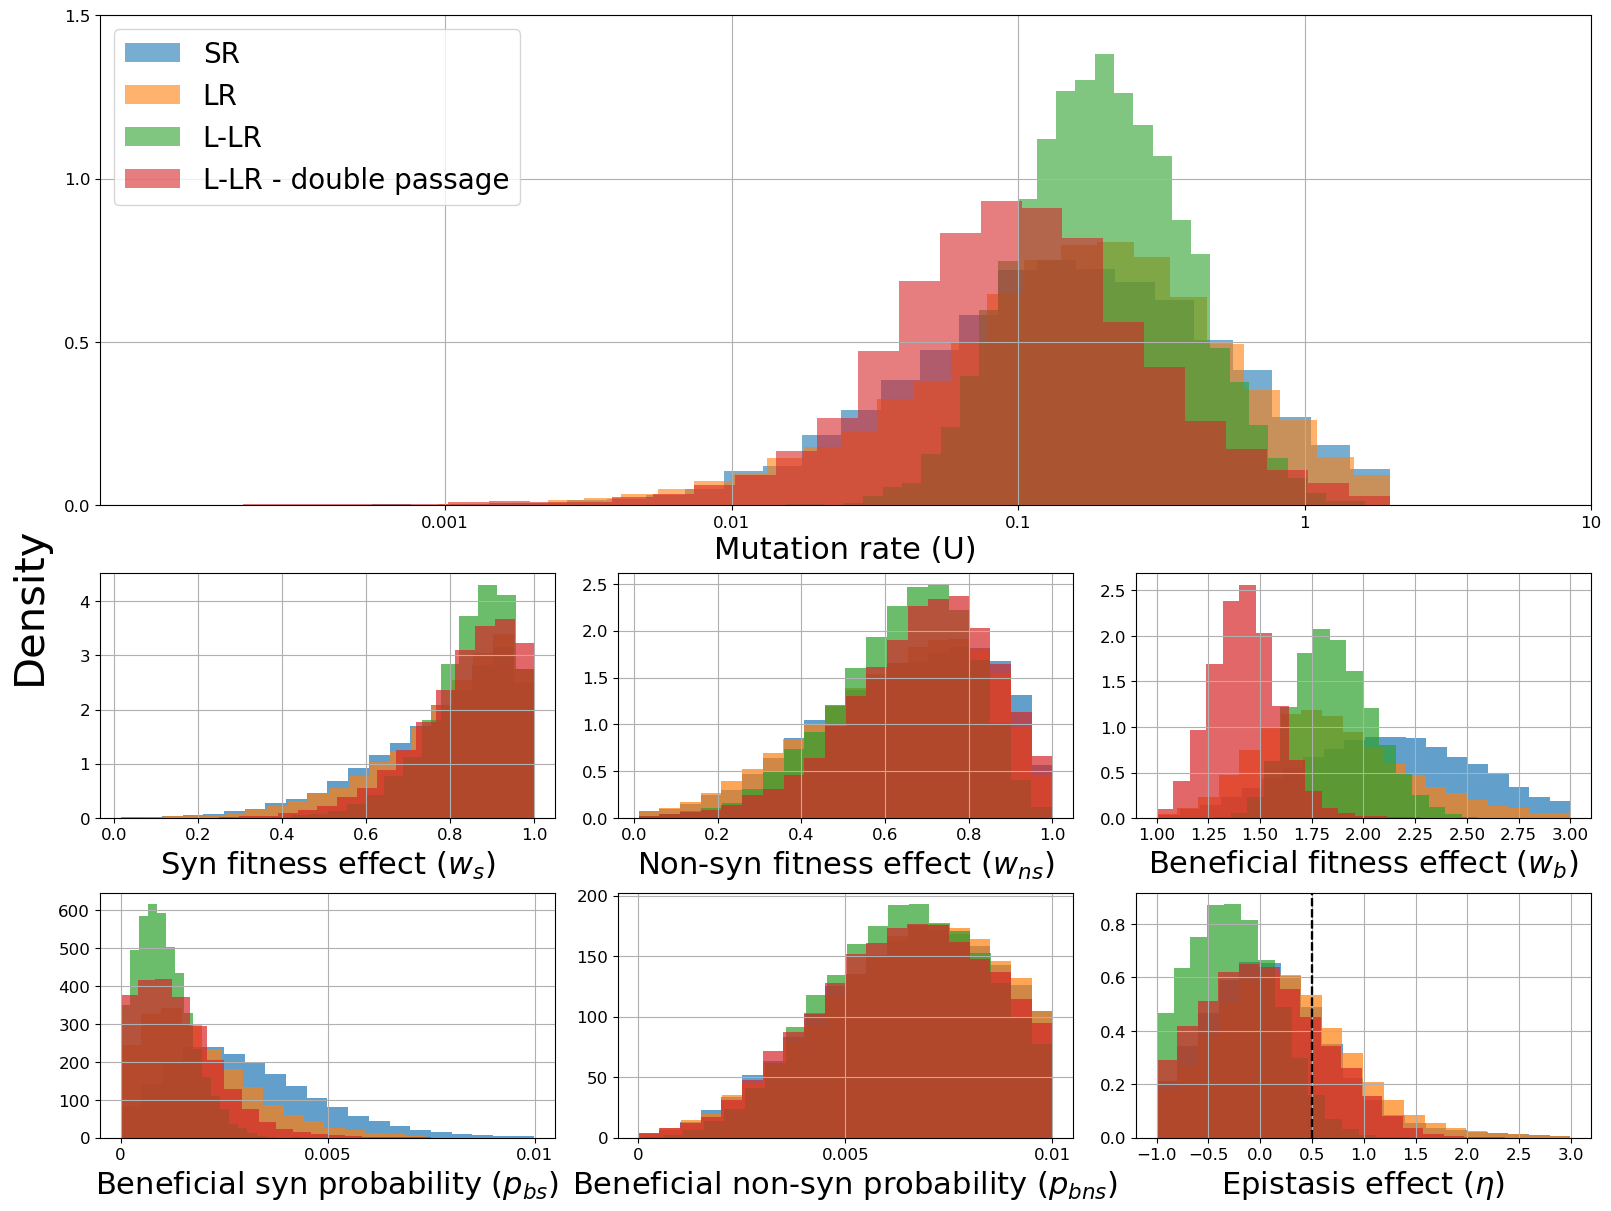

In [40]:
# Original fig4a
fig4a = compare_posts_for_paper({'SR': all_posts['SR'], 'LR': all_posts['LR'], 'L-LR': all_posts['L-LR']})
# Supp fig4a - with modified model
fig4sup = compare_posts_for_paper({'SR': all_posts['SR'], 'LR': all_posts['LR'], 'L-LR': all_posts['L-LR'], 'L-LR - double passage': all_posts['L-LR double passage']})


## Table 1 + Table S2 data

In [41]:
all_posts_tmp = {k :v.rename(columns={v:k for k,v in rename_dict.items()}) for k,v in all_posts.items()}
stats = {k : calc_stats(v, None, prior) for k,v in all_posts_tmp.items()}
for k, v in stats.items():
    for param in v.param.unique():
        print(k)
        print(param)
        print(v[v.param==param][['hdi95_low', 'mode', 'hdi95_high']])

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

SR
mu
   hdi95_low   mode  hdi95_high
0  -1.837667 -0.817    0.190504
SR
w_ada
   hdi95_low   mode  hdi95_high
1   1.353917  1.917    2.919198
SR
w_syn
   hdi95_low   mode  hdi95_high
2   0.448635  0.936    0.999974
SR
w_non_syn
   hdi95_low   mode  hdi95_high
3   0.268665  0.807    0.990262
SR
p_ada_non_syn
   hdi95_low     mode  hdi95_high
4   0.002715  0.00675    0.009996
SR
p_ada_syn
      hdi95_low     mode  hdi95_high
5  5.223809e-07  0.00215    0.006335
SR
p0_non_syn
   hdi95_low   mode  hdi95_high
6   0.705521  0.777    0.874085
SR
p0_syn
   hdi95_low   mode  hdi95_high
7   0.454286  0.553    0.599987
SR
w_penalty
   hdi95_low  mode  hdi95_high
8    0.00002  0.05    1.349327
SR
epistasis_boost
   hdi95_low   mode  hdi95_high
9  -0.998876  0.219    1.243093
LR
mu
   hdi95_low    mode  hdi95_high
0  -1.881174 -0.7315    0.162901
LR
w_ada
   hdi95_low  mode  hdi95_high
1   1.217834  1.77    2.613342
LR
w_syn
   hdi95_low   mode  hdi95_high
2   0.472251  0.917    0.999996
LR
w_non_

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


# Large Errors (10x loop errs)

In [151]:
large_errs_LLR = {}

In [152]:
errs = '5e-04'
replica = 'A'
sumstat_type = 'L-LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.853500  -1.435542  1.857084   -0.262333  -1.082482   
1            w_syn  0.860000   0.655945  1.270238    0.999023   0.804427   
2        w_non_syn  0.493500   0.108994  0.862253    0.704020   0.343183   
3            w_ada  1.846500   1.557426  1.349447    2.189240   1.735053   
4        p_ada_syn  0.000806   0.000008  1.812183    0.001714   0.000445   
5    p_ada_non_syn  0.007845   0.004060  0.832430    0.009999   0.006725   
6           p0_syn  0.475000   0.419209  0.637174    0.590368   0.473081   
7       p0_non_syn  0.789000   0.709335  0.637936    0.881592   0.767292   
8        w_penalty  0.389000   0.000403  0.845939    1.321483   0.178449   
9  epistasis_boost -0.573500  -0.999315  1.193038    0.425197  -0.802631   

   hdi50_high     model  
0   -0.669465  ensemble  
1    0.920712  ensemble  
2    0.559429  ensemble  
3    1.944895  ensemble  
4    0.001088  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [153]:
errs = '5e-04'
replica = 'B'
sumstat_type = 'L-LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.409000 -8.037775e-01  1.155919    0.077305  -0.506839   
1            w_syn  0.684000  4.828144e-01  1.209941    0.861395   0.615690   
2        w_non_syn  0.295500  5.837903e-02  1.079518    0.496312   0.198101   
3            w_ada  1.767500  1.546181e+00  1.406736    2.115768   1.696671   
4        p_ada_syn  0.000767  4.197219e-08  1.830713    0.001672   0.000298   
5    p_ada_non_syn  0.002345  6.553151e-04  1.151159    0.004832   0.001704   
6           p0_syn  0.497000  4.017241e-01  0.638974    0.575242   0.447729   
7       p0_non_syn  0.797000  7.078071e-01  0.612076    0.884147   0.761173   
8        w_penalty  1.857500  8.726065e-01  0.936508    1.999938   1.622154   
9  epistasis_boost -0.196500 -9.932035e-01  1.129897    0.586280  -0.396828   

   hdi50_high     model  
0   -0.211038  ensemble  
1    0.746650  ensemble  
2    0.358075  ensemble  
3    1.897344  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [154]:
errs = '5e-04'
replica = 'C'
sumstat_type = 'L-LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.751500 -1.285862e+00  1.469954   -0.018443  -0.902104   
1            w_syn  0.879500  7.051079e-01  1.384568    0.999760   0.805396   
2        w_non_syn  0.423000  1.286107e-01  0.981512    0.641798   0.332962   
3            w_ada  1.958500  1.593024e+00  1.300471    2.257011   1.826765   
4        p_ada_syn  0.000788  9.783747e-07  1.816958    0.001674   0.000344   
5    p_ada_non_syn  0.005180  2.086913e-03  0.840398    0.008480   0.003646   
6           p0_syn  0.473000  4.023889e-01  0.614203    0.575125   0.450331   
7       p0_non_syn  0.813000  7.046201e-01  0.622538    0.878777   0.757806   
8        w_penalty  1.651000  6.299592e-01  0.773454    1.999781   1.441940   
9  epistasis_boost -0.379000 -9.984577e-01  1.210535    0.410783  -0.716652   

   hdi50_high     model  
0   -0.498815  ensemble  
1    0.910285  ensemble  
2    0.511873  ensemble  
3    2.054470  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

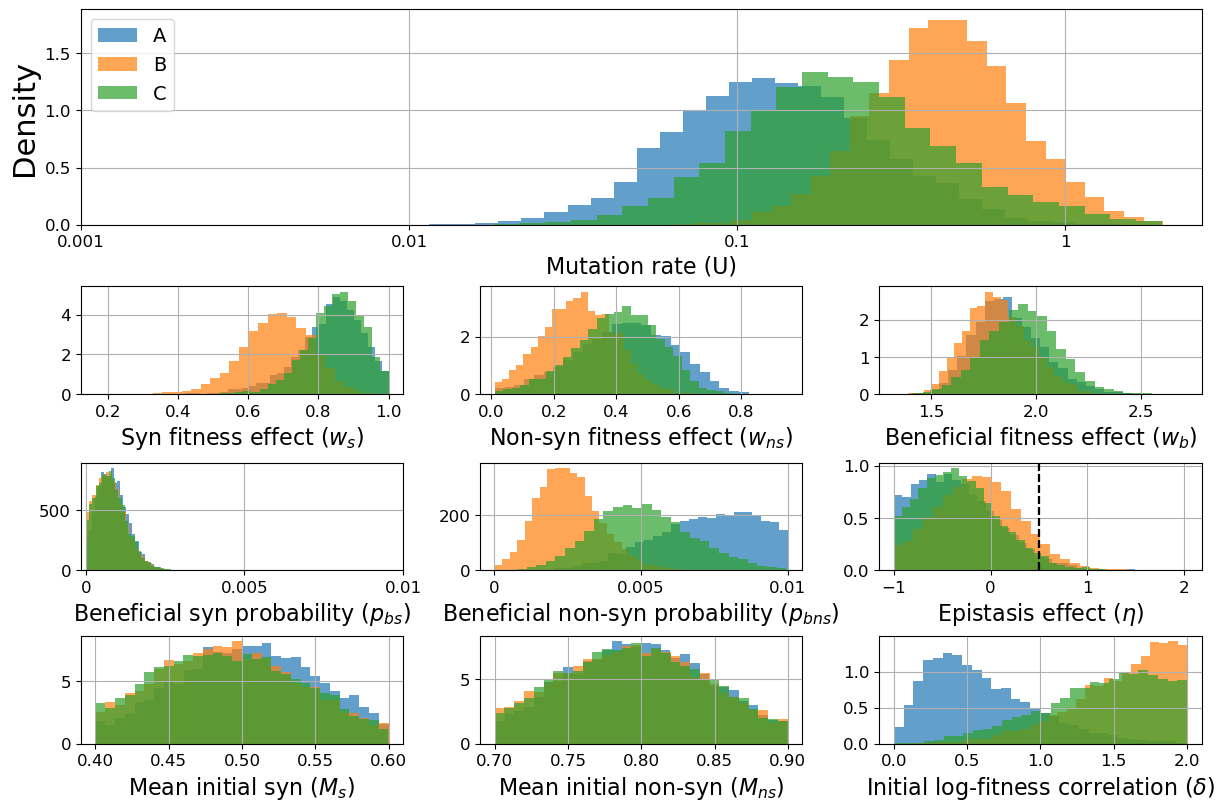

In [155]:
compare_posts_across_lines(large_errs_LLR)

## Fig 4B + S?

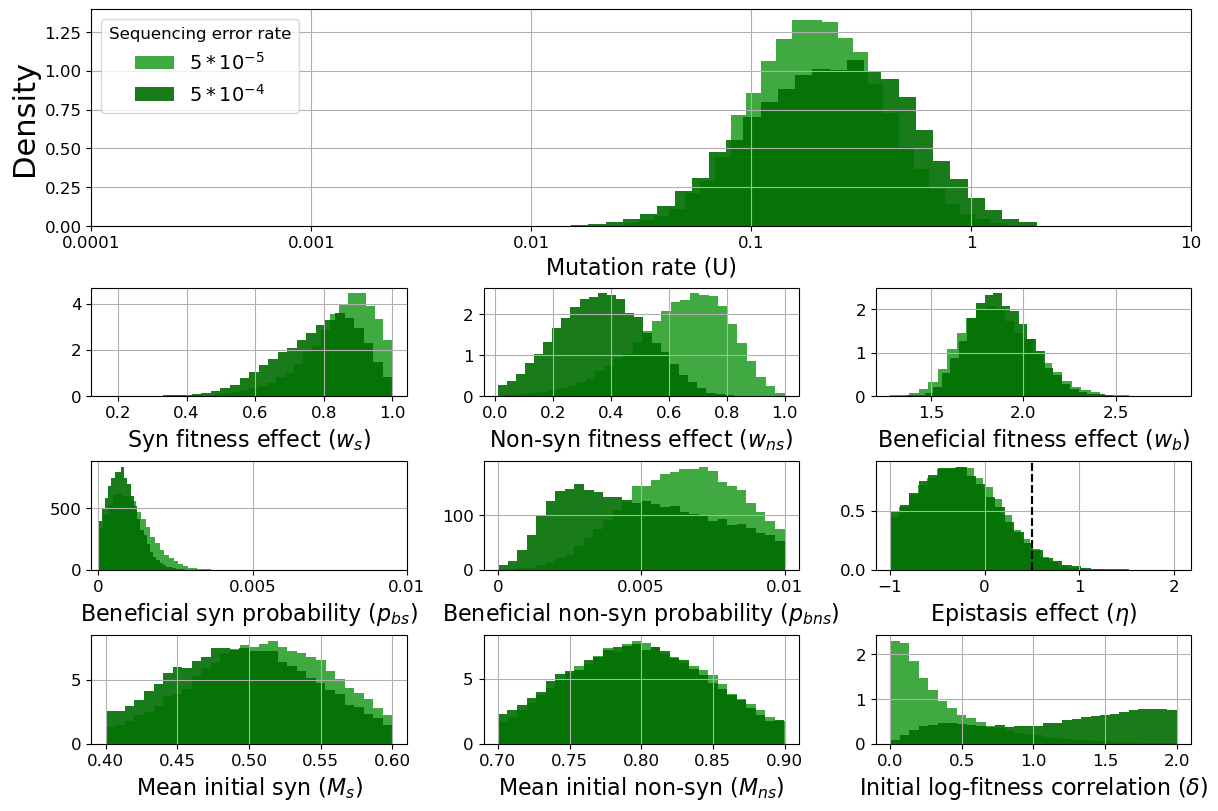

In [157]:
man_errs = {r'$5*10^{-5}$': pd.concat([x[0] for x in inf_LLR.values()]),
            r'$5*10^{-4}$': pd.concat([x[0] for x in large_errs_LLR.values()])}
not_C2 = [max(x-0.2,0) for x in sns.color_palette()[2]]
a=compare_posts(man_errs, mu_xticks=(-4,2), legend_title='Sequencing error rate',
                             colors=['C2', not_C2], alpha=0.9)
a.savefig('figs9.tif',bbox_inches='tight', dpi=500)
# b = 
# fig = plt.figure()
# fig.axes.append(b)
# fig.savefig('b.png')

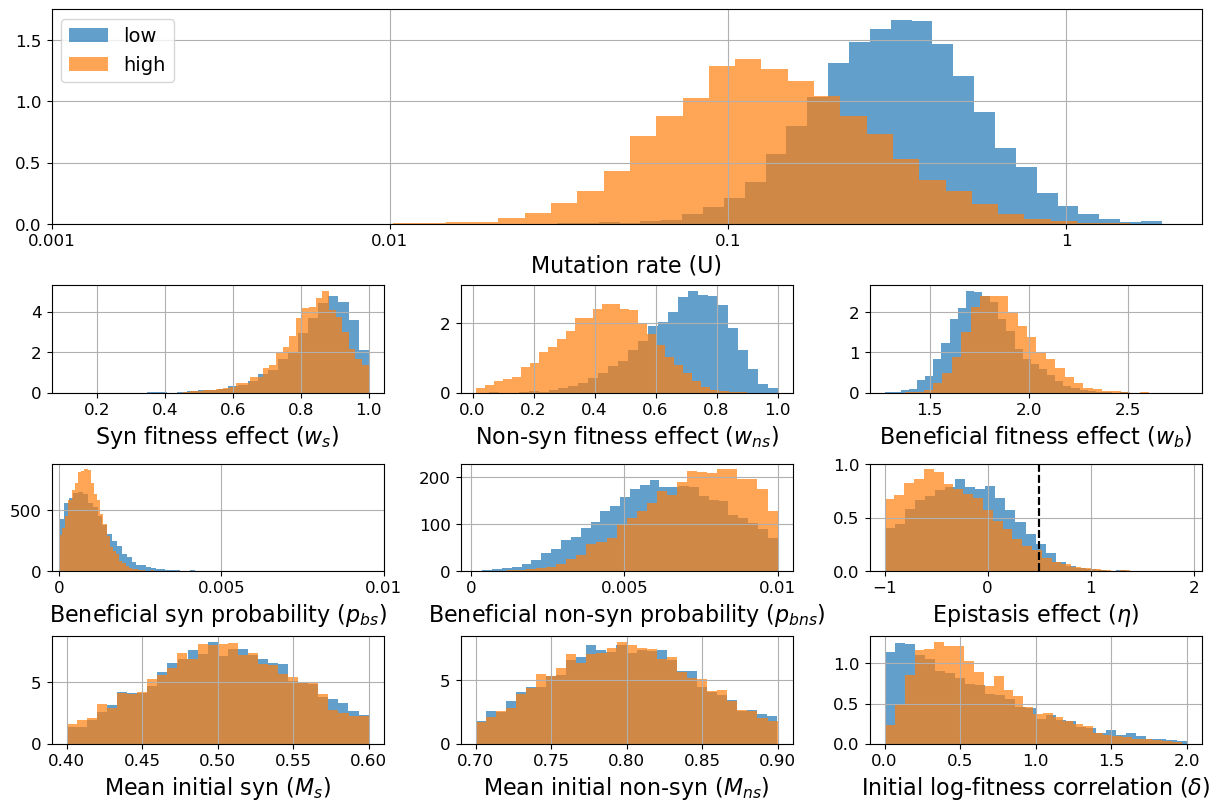

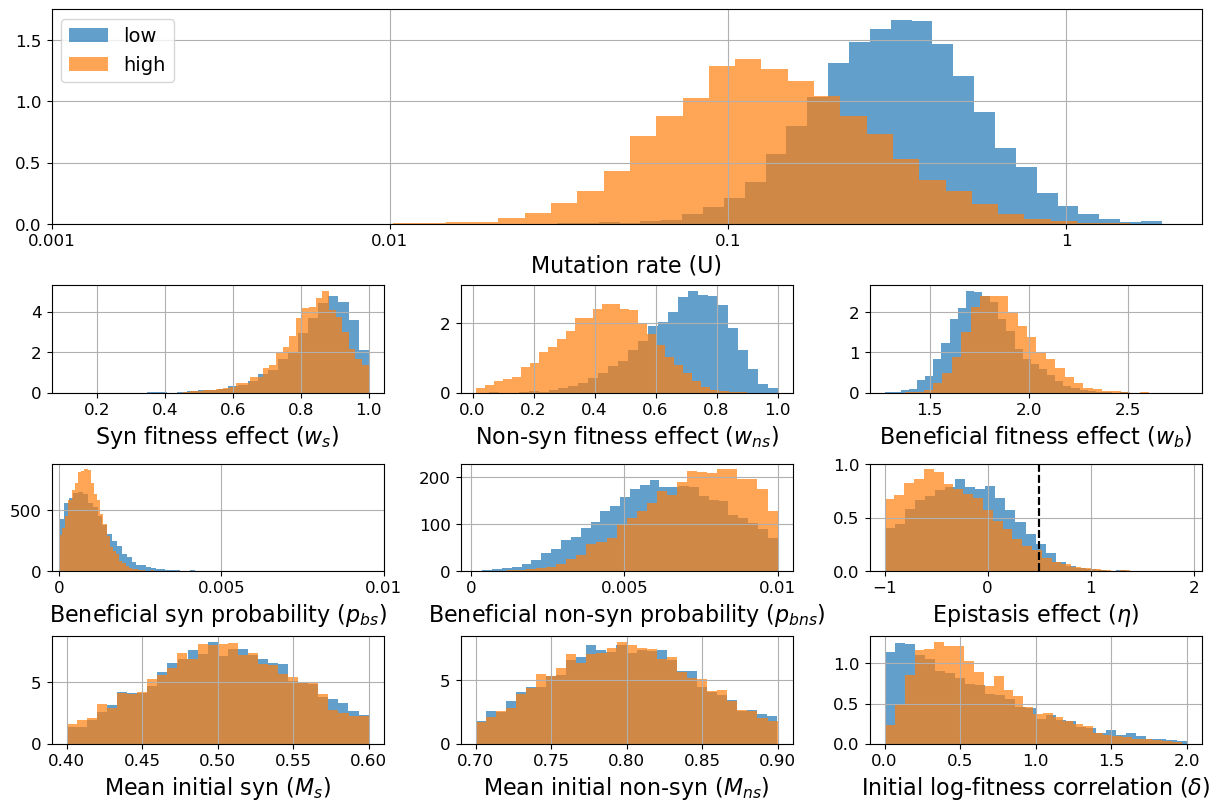

In [54]:
replica = 'A'
compare_posts({'low': inf_LLR[replica][0], 'high': large_errs_LLR[replica][0]})


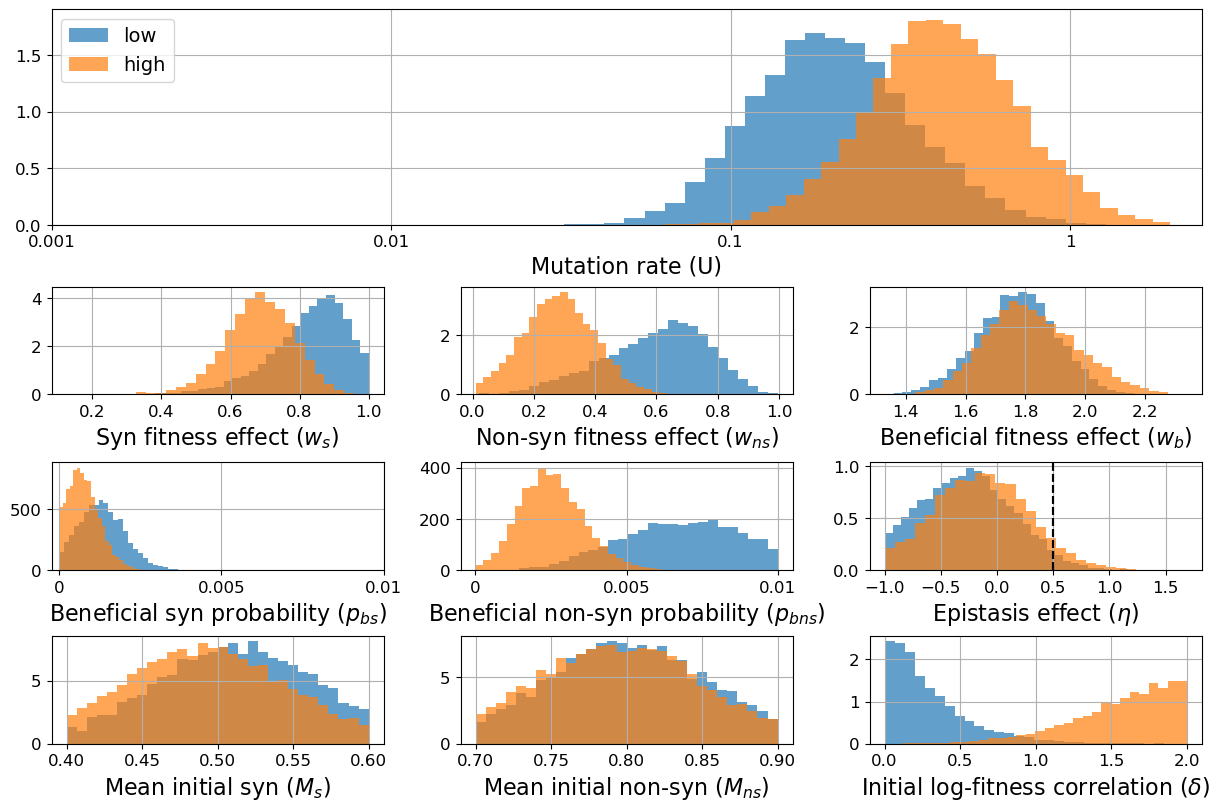

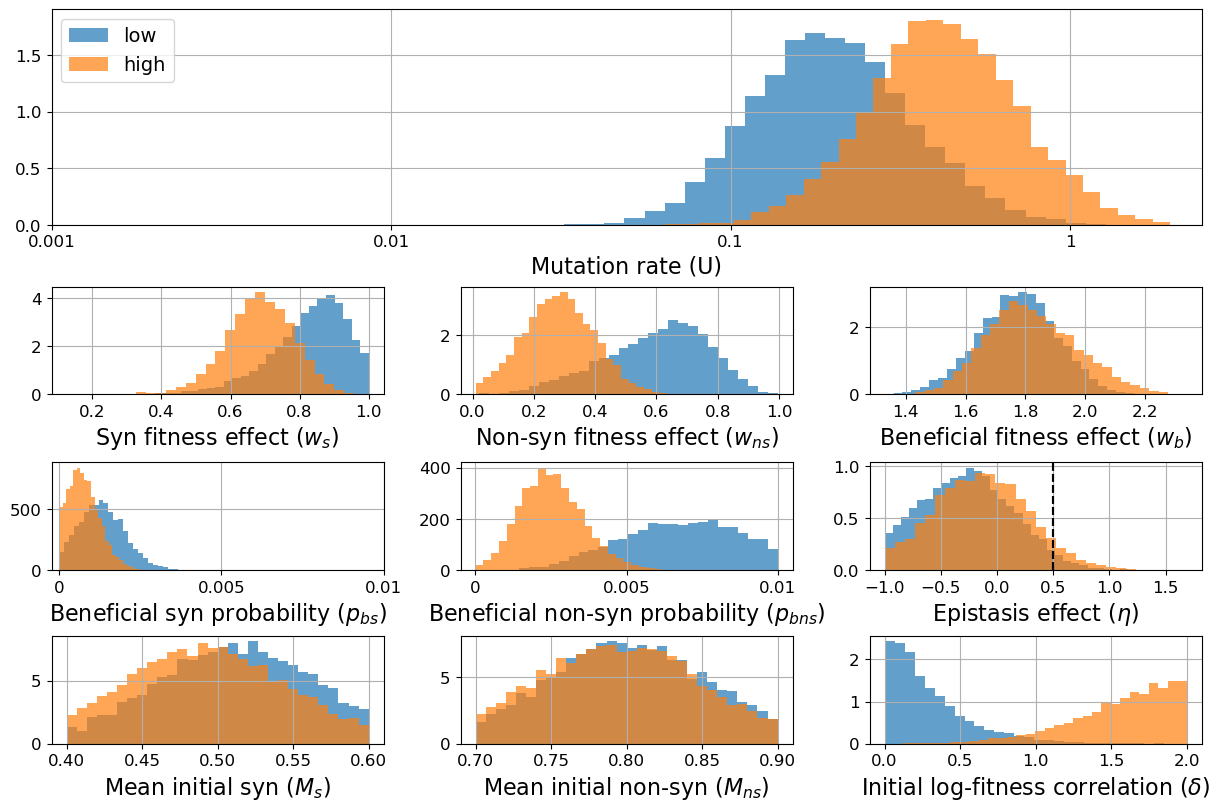

In [55]:
replica = 'B'
compare_posts({'low': inf_LLR[replica][0], 'high': large_errs_LLR[replica][0]})

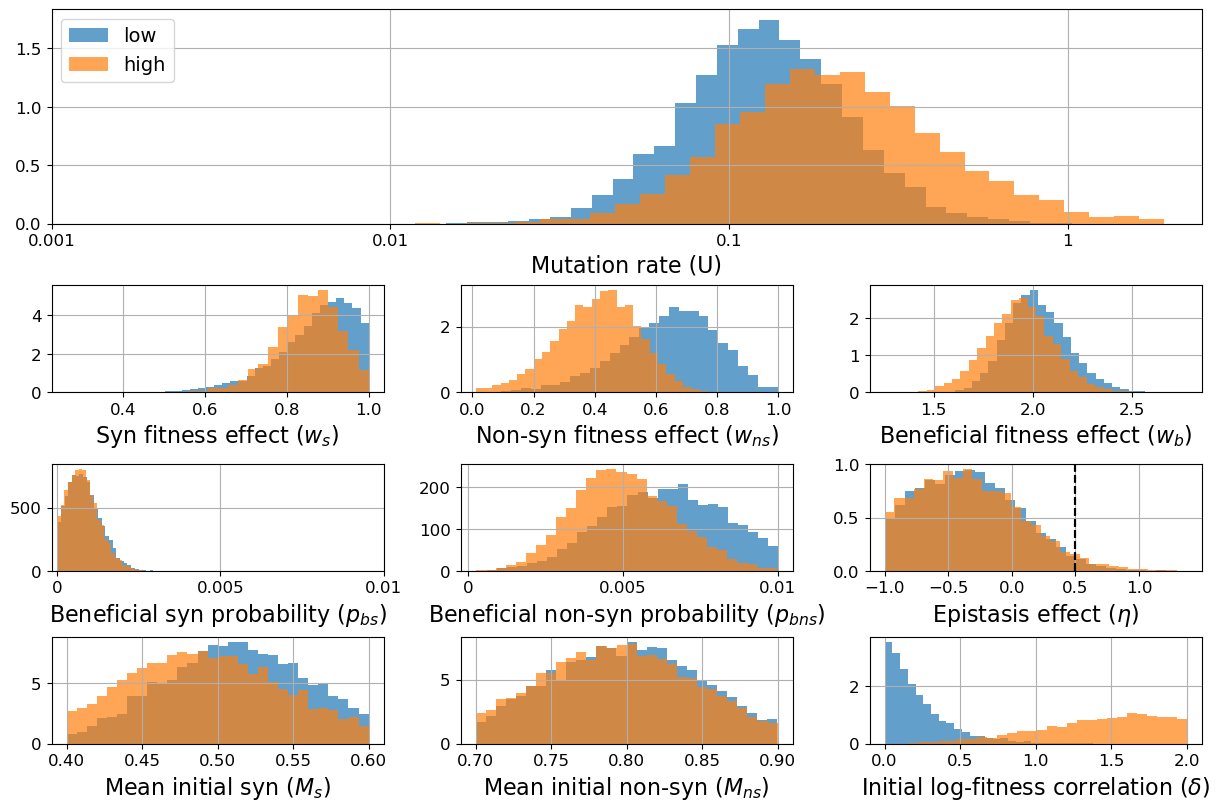

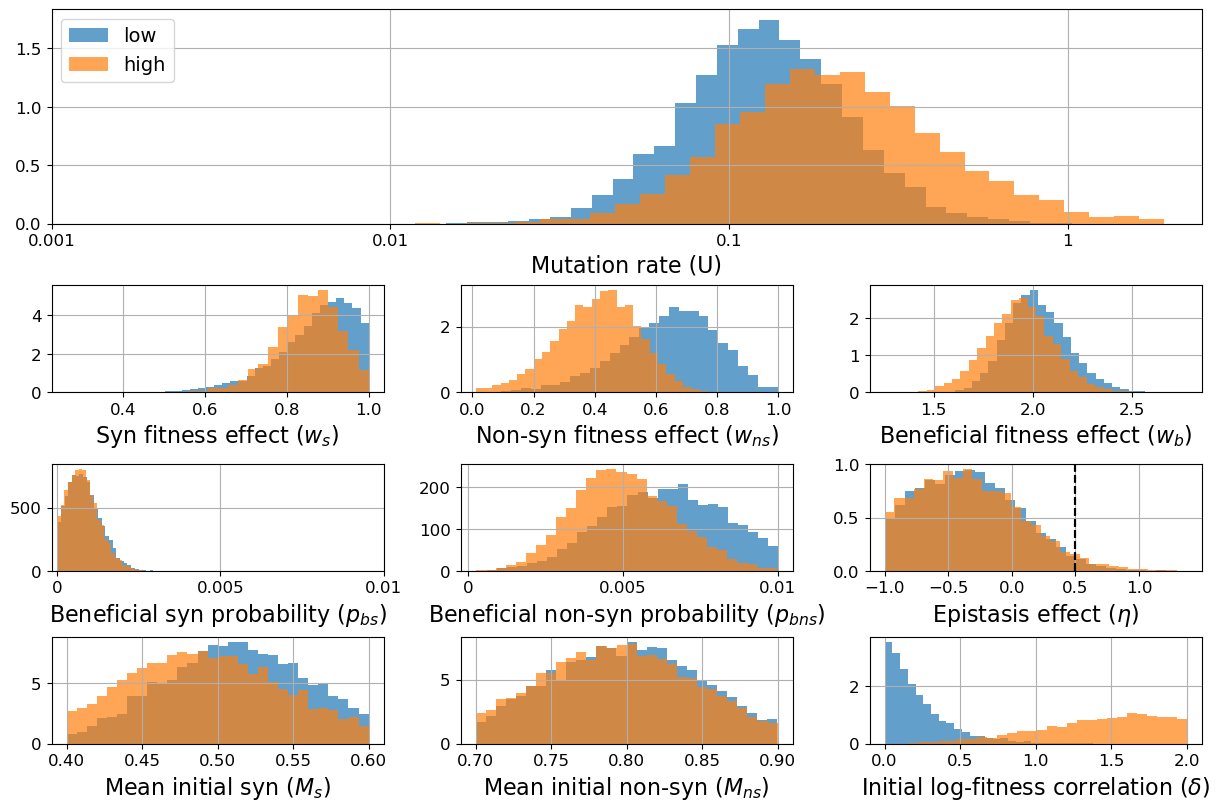

In [56]:
replica = 'C'
compare_posts({'low': inf_LLR[replica][0], 'high': large_errs_LLR[replica][0]})

In [57]:
large_errs_LR = {}

In [58]:
errs = '5e-04'
replica = 'A'
sumstat_type = 'LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -3.00800  -3.888615  6.404490   -2.244193  -3.435286   
1            w_syn  0.82900   0.477048  1.012968    0.968712   0.714271   
2        w_non_syn  0.39550   0.019824  0.723426    0.716481   0.171664   
3            w_ada  2.77800   2.335598  1.245304    2.999765   2.614724   
4        p_ada_syn  0.00291   0.000307  0.932935    0.005889   0.001660   
5    p_ada_non_syn  0.00689   0.003032  0.744423    0.009990   0.005871   
6           p0_syn  0.54900   0.454943  0.718551    0.599807   0.508306   
7       p0_non_syn  0.82300   0.734396  0.655725    0.899851   0.785365   
8        w_penalty  0.21000   0.032950  1.131971    1.007001   0.146447   
9  epistasis_boost  1.67250   0.761825  0.991800    2.795830   1.418628   

   hdi50_high     model  
0   -2.869276  ensemble  
1    0.879398  ensemble  
2    0.477129  ensemble  
3    2.885526  ensemble  
4    0.003631  ensemble  
5    0.008619  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [59]:
errs = '5e-04'
replica = 'B'
sumstat_type = 'LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.893500  -1.692916  1.871741   -0.267269  -1.192207   
1            w_syn  0.848000   0.529885  1.149628    0.955470   0.777896   
2        w_non_syn  0.274000   0.036203  0.875262    0.593585   0.197126   
3            w_ada  1.919000   1.377974  0.953885    2.486997   1.713923   
4        p_ada_syn  0.003430   0.000674  0.896413    0.006421   0.002210   
5    p_ada_non_syn  0.006575   0.002697  0.716256    0.009996   0.005890   
6           p0_syn  0.495000   0.404339  0.645736    0.574265   0.450813   
7       p0_non_syn  0.785000   0.717896  0.633352    0.892268   0.761605   
8        w_penalty  0.836000   0.240608  0.681337    1.835972   0.608414   
9  epistasis_boost  1.019500   0.505002  1.550690    1.696785   0.891972   

   hdi50_high     model  
0   -0.706414  ensemble  
1    0.909196  ensemble  
2    0.422252  ensemble  
3    2.086787  ensemble  
4    0.004276  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [60]:
errs = '5e-04'
replica = 'C'
sumstat_type = 'LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.09385  -0.515107  0.742398    0.286172  -0.174260   
1            w_syn  0.56850   0.349014  1.008462    0.816241   0.528433   
2        w_non_syn  0.17950   0.010139  1.175445    0.384283   0.077746   
3            w_ada  1.35100   1.075224  1.282272    1.756983   1.227663   
4        p_ada_syn  0.00235   0.000088  0.820676    0.006698   0.001893   
5    p_ada_non_syn  0.00816   0.003502  0.802033    0.009999   0.006634   
6           p0_syn  0.47500   0.400107  0.639825    0.567676   0.438585   
7       p0_non_syn  0.76900   0.713053  0.621506    0.887985   0.768321   
8        w_penalty  1.85350   0.668090  0.793675    1.999694   1.405884   
9  epistasis_boost -0.02815  -0.999859  0.885972    1.339512  -0.553383   

   hdi50_high     model  
0    0.126509  ensemble  
1    0.705885  ensemble  
2    0.217454  ensemble  
3    1.463604  ensemble  
4    0.004210  ensemble  
5    0.009239  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

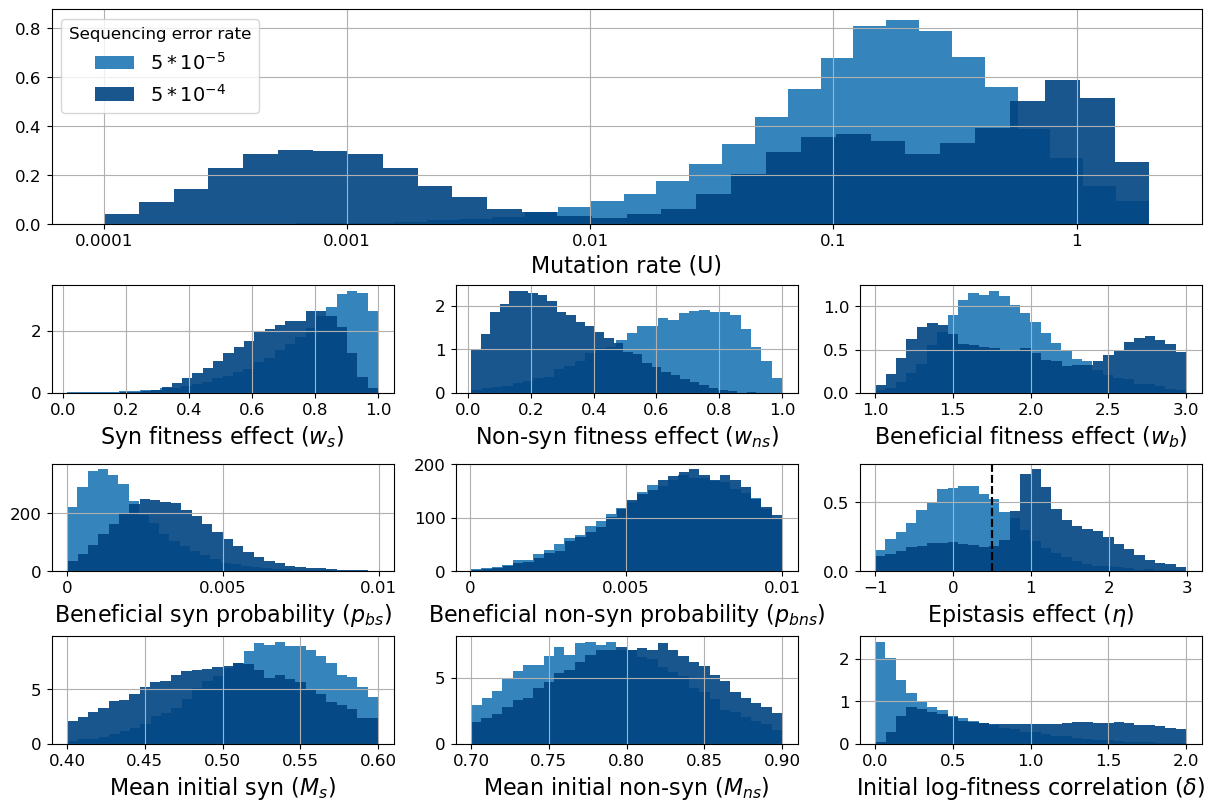

In [67]:
LR_errs = {r'$5*10^{-5}$': pd.concat([x[0] for x in inf_LR.values()]),
            r'$5*10^{-4}$': pd.concat([x[0] for x in large_errs_LR.values()])}
not_C0 = [max(x-0.2,0) for x in sns.color_palette()[0]]
figs4 = compare_posts(LR_errs, mu_xticks=(-4,1), legend_title='Sequencing error rate',
                             colors=['C0', not_C0], alpha=0.9)
figs4.savefig('figs4.pdf')

In [62]:
large_errs_SR = {}

In [63]:
errs = '5e-04'
replica = 'A'
sumstat_type = 'SR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -3.22600  -3.999890  5.904867   -1.817199  -3.681195   
1            w_syn  0.88800   0.499266  0.993399    0.999512   0.756807   
2        w_non_syn  0.34850   0.028109  0.705931    0.757849   0.176257   
3            w_ada  2.39000   1.471908  0.676853    2.999855   1.935727   
4        p_ada_syn  0.00245   0.000020  0.686355    0.008097   0.001411   
5    p_ada_non_syn  0.00525   0.001797  0.658169    0.009922   0.004492   
6           p0_syn  0.54700   0.463770  0.762975    0.599909   0.521748   
7       p0_non_syn  0.83100   0.738431  0.664990    0.899988   0.812272   
8        w_penalty  0.21600   0.066196  1.129359    1.107937   0.149907   
9  epistasis_boost  2.14450   1.150015  0.993064    2.997169   1.714829   

   hdi50_high     model  
0   -2.823079  ensemble  
1    0.927860  ensemble  
2    0.493259  ensemble  
3    2.620602  ensemble  
4    0.004404  ensemble  
5    0.007794  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [64]:
errs = '5e-04'
replica = 'B'
sumstat_type = 'SR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -1.27500  -2.295187  1.987536   -0.071204  -1.576468   
1            w_syn  0.86350   0.497555  1.134627    0.956018   0.775894   
2        w_non_syn  0.41900   0.057730  0.838732    0.643534   0.228609   
3            w_ada  2.77100   1.451225  0.676375    2.999751   2.178272   
4        p_ada_syn  0.00425   0.000914  0.783668    0.007895   0.002683   
5    p_ada_non_syn  0.00698   0.002835  0.739237    0.009988   0.005497   
6           p0_syn  0.46900   0.400382  0.619314    0.574113   0.450646   
7       p0_non_syn  0.81700   0.711711  0.628838    0.886875   0.763143   
8        w_penalty  1.25550   0.239477  0.668952    1.844132   0.496765   
9  epistasis_boost  0.76000  -0.283563  1.003420    2.024734   0.477358   

   hdi50_high     model  
0   -0.824395  ensemble  
1    0.906413  ensemble  
2    0.477290  ensemble  
3    2.821024  ensemble  
4    0.005268  ensemble  
5    0.008248  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [65]:
errs = '5e-04'
replica = 'C'
sumstat_type = 'SR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.11600  -0.781052  0.786309    0.280525  -0.389197   
1            w_syn  0.53250   0.285815  0.880990    0.837206   0.456330   
2        w_non_syn  0.12050   0.010096  1.167863    0.409086   0.044725   
3            w_ada  2.55650   1.788658  0.837408    2.999983   2.255304   
4        p_ada_syn  0.00385   0.000991  0.865736    0.007275   0.002570   
5    p_ada_non_syn  0.00746   0.003322  0.789605    0.010000   0.006490   
6           p0_syn  0.50900   0.406630  0.600800    0.586497   0.455432   
7       p0_non_syn  0.81100   0.701743  0.592667    0.880096   0.754951   
8        w_penalty  1.35600   0.441029  0.671389    1.988270   0.839290   
9  epistasis_boost -0.49050  -0.999176  1.173050    0.459337  -0.680569   

   hdi50_high     model  
0    0.009422  ensemble  
1    0.672013  ensemble  
2    0.177267  ensemble  
3    2.744693  ensemble  
4    0.004753  ensemble  
5    0.009058  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

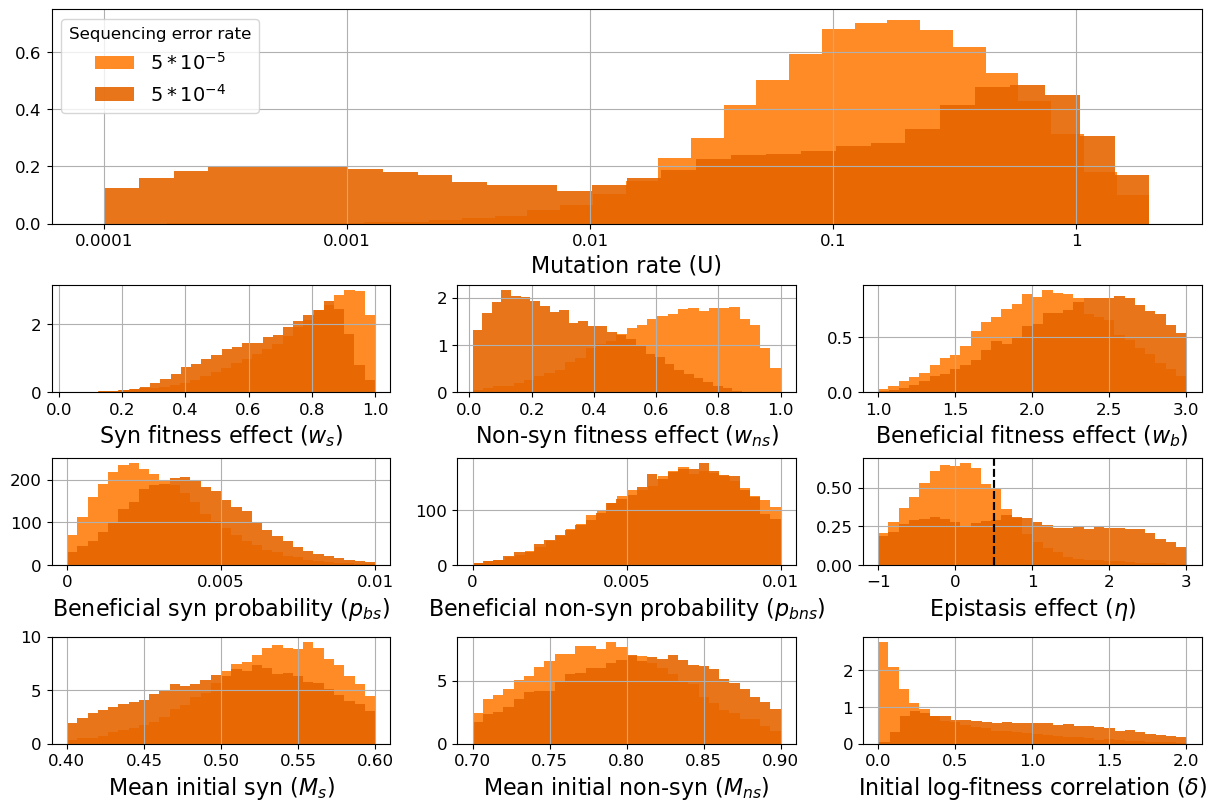

In [68]:
SR_errs = {r'$5*10^{-5}$': pd.concat([x[0] for x in inf_SR.values()]),
            r'$5*10^{-4}$': pd.concat([x[0] for x in large_errs_SR.values()])}
not_C1 = [max(x-0.1,0) for x in sns.color_palette()[1]]
figs5 = compare_posts(SR_errs, mu_xticks=(-4,1), legend_title='Sequencing error rate',
                             colors=['C1', not_C1], alpha=0.9)
figs5.savefig('figs5.pdf')